In [1]:
import skimage.filters as filters
import numpy as np
import matplotlib.pylab as plt 
import time
import scipy.ndimage
from scipy import signal
from scipy.fftpack import fftn, ifftn, fftshift, ifftshift
from scipy.ndimage import binary_fill_holes
from skimage import io, color, util
from skimage.filters import threshold_otsu, threshold_local
from skimage.morphology import square, rectangle, diamond, disk, cube, octahedron, ball, star, octagon
from skimage.morphology import binary_dilation, binary_erosion, binary_opening, binary_closing
from skimage.morphology import dilation, erosion, opening, closing, white_tophat, remove_small_objects

%matplotlib inline

# Extraction

Text(0.5, 1.0, 'Blue Image')

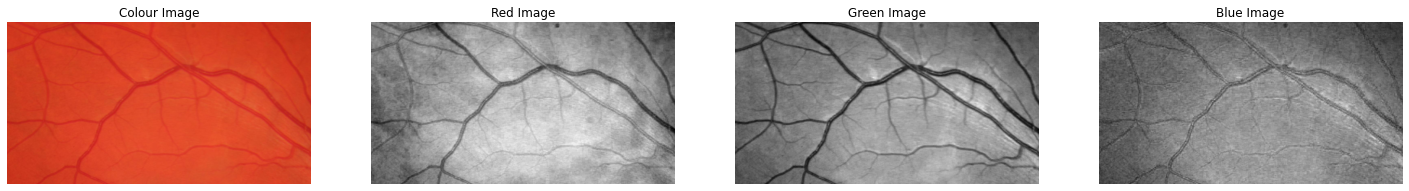

In [2]:
# disect image into RGB channels

im_colour = io.imread("images/2106753_vesselimage.jpg")

plt.figure(figsize=(25,25)) 
plt.subplot(2,4,1)
plt.imshow(im_colour)
plt.axis('off')
plt.title('Colour Image')

plt.subplot(2,4,2)
red = im_colour[:,:,0]
plt.imshow(red, cmap='gray')
plt.axis('off')
plt.title('Red Image')

plt.subplot(2,4,3)
green = im_colour[:,:,1]
plt.imshow(green, cmap='gray')
plt.axis('off')
plt.title('Green Image')

plt.subplot(2,4,4)
blue = im_colour[:,:,2]
plt.imshow(blue, cmap='gray')
plt.axis('off')
plt.title('Blue Image')

Text(0.5, 1.0, 'Value Image')

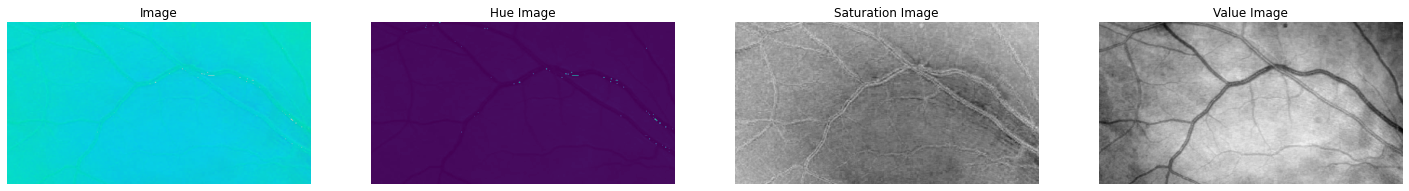

In [3]:
# transform rgb image into HSV
imhsv = color.rgb2hsv(im_colour)

# displaying each hsv channel
plt.figure(figsize=(25,25)) 
plt.subplot(2,4,1)
plt.imshow(imhsv)
plt.axis('off')
plt.title('Image')

plt.subplot(2,4,2)
hue = imhsv[:,:,0]
plt.imshow(hue)
plt.axis('off')
plt.title('Hue Image')

plt.subplot(2,4,3)
sat = imhsv[:,:,1]
plt.imshow(sat, cmap='gray')
plt.axis('off')
plt.title('Saturation Image')

plt.subplot(2,4,4)
val = imhsv[:,:,2]
plt.imshow(val, cmap='gray')
plt.axis('off')
plt.title('Value Image')

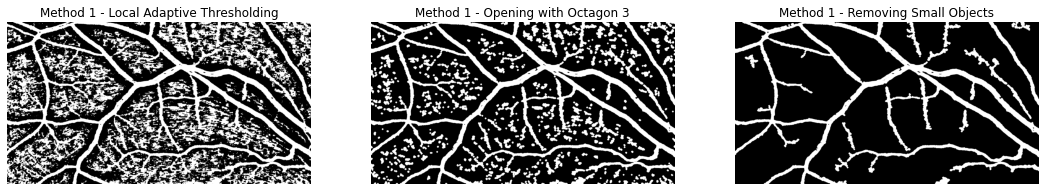

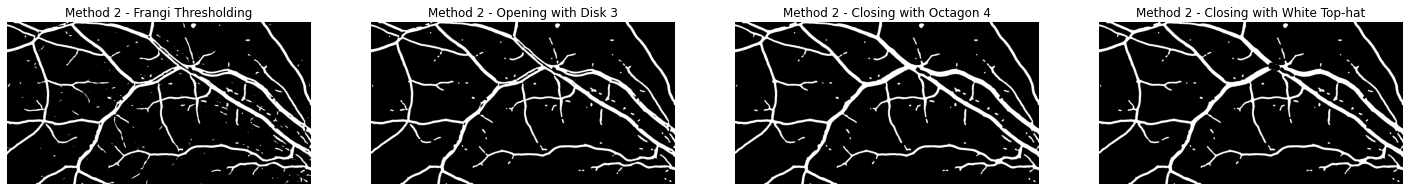

In [10]:
# Method 1
def method(img):
    #imgray = color.rgb2gray(img)
    #imbw = img.astype(float)
    #imbw = imbw-imbw.min()                    
    #imbw = imbw/imbw.max()
    
    # local/binary adaptive thresholding
    block_size = 125
    imbw = img < filters.threshold_local(img, block_size,method = 'gaussian')
    
    # Opening and removing small objects
    img_open = opening(imbw, octagon(3,3))
    img_rso = remove_small_objects(img_open, 1500, connectivity=1)

    plt.figure(figsize = (25,25))  
    plt.subplot(2,4,1)          
    plt.imshow(imbw, cmap="gray")
    plt.axis('off')
    plt.title('Method 1 - Local Adaptive Thresholding')
    
    plt.subplot(2,4,2)                  
    plt.imshow(img_open, cmap="gray")
    plt.axis('off')
    plt.title('Method 1 - Opening with Octagon 3')
    
    plt.subplot(2,4,3)                  
    plt.imshow(img_rso, cmap="gray")
    plt.axis('off')
    plt.title('Method 1 - Removing Small Objects')

# Method 2
def method_two(img):
    # Frangi filter using both plate-like and blob-like structuring elements
    frangi_img = filters.frangi(img, sigmas=(0.5, 5), scale_step=2, alpha=10, beta=15, black_ridges=True)
    # Thresholding
    thresh = np.where(frangi_img > np.mean(frangi_img), 1, 0)
    # Cleanup with opening and closing
    img_open = opening(thresh, disk(3))
    img_close = closing(img_open, octagon(4,4))
    img_wth = white_tophat(img_close, disk(15))

    plt.figure(figsize = (25,25))  
    plt.subplot(2,4,1)          
    plt.imshow(thresh, cmap="gray")
    plt.axis('off')
    plt.title('Method 2 - Frangi Thresholding')
    
    plt.subplot(2,4,2)                  
    plt.imshow(img_open, cmap="gray")
    plt.axis('off')
    plt.title('Method 2 - Opening with Disk 3')
    
    plt.subplot(2,4,3)                  
    plt.imshow(img_close, cmap="gray")
    plt.axis('off')
    plt.title('Method 2 - Closing with Octagon 4')

    plt.subplot(2,4,4)                  
    plt.imshow(img_wth, cmap="gray")
    plt.axis('off')
    plt.title('Method 2 - Closing with White Top-hat')
    
method(green)
method_two(green)

In [74]:
# M1
block_size = 125
imbw = green < filters.threshold_local(green, block_size,method = 'gaussian')
img_open = opening(imbw, octagon(3,3))
M1 = remove_small_objects(img_open, 1500, connectivity=1)
# M2
frangi_img = filters.frangi(green, sigmas=(0.5, 5), scale_step=2, alpha=10, beta=15, black_ridges=True)
thresh = np.where(frangi_img > np.mean(frangi_img), 1, 0)
M2 = opening(thresh, disk(3))
M2 = closing(M2, octagon(4,4))

Text(0.5, 1.0, 'Method 2 - Overlayed Image')

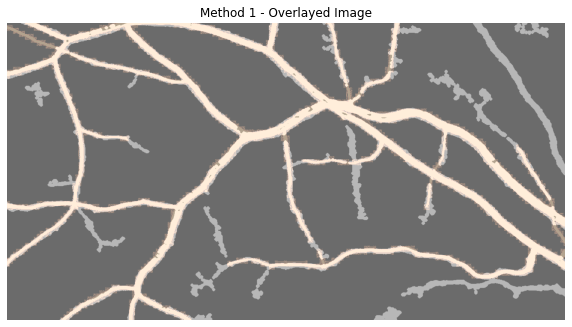

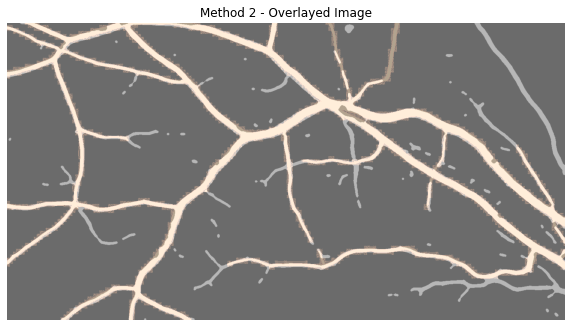

In [75]:

mask = io.imread("images/2106753_vesselmask.jpg")
mask = mask > 0.5

plt.figure(figsize = (10,10))
plt.imshow(mask, cmap="copper", alpha=0.4)
plt.imshow(M1, cmap="gray", alpha=0.3)
plt.axis('off')
plt.title('Method 1 - Overlayed Image')

plt.figure(figsize = (10,10))
plt.imshow(mask, cmap="copper", alpha=0.4)
plt.imshow(M2, cmap="gray", alpha=0.3)
plt.axis('off')
plt.title('Method 2 - Overlayed Image')

In [76]:
# Dice similarity scores for Method 1 and Method 2

dice = np.sum(M1[mask==1])*2.0 / (np.sum(M1) + np.sum(mask))
dice2 = np.sum(M2[mask==1])*2.0 / (np.sum(M2) + np.sum(mask))

print(f'Dice similarity score for Method 1 is: {dice}')
print(f'Dice similarity score for Method 2 is: {dice2}')

Dice similarity score for Method 1 is: 0.697612756515895
Dice similarity score for Method 2 is: 0.7257631744923156


# Segmentation

In [77]:
import skimage.filters as filters
import numpy as np
import matplotlib.pylab as plt 
import time
import scipy.ndimage
import sknw
from scipy import signal
from skimage import io, color
from skimage.morphology import square, rectangle, diamond, disk, cube, octahedron, ball, star, octagon
from skimage.morphology import binary_dilation, binary_erosion, binary_opening, binary_closing
from skimage.morphology import dilation, erosion, opening, closing, white_tophat, remove_small_objects
from skimage.morphology import skeletonize, thin
from skimage.transform import hough_line, hough_line_peaks
from skimage.measure import label, regionprops

%matplotlib inline

Text(0.5, 1.0, 'Morphological Opening')

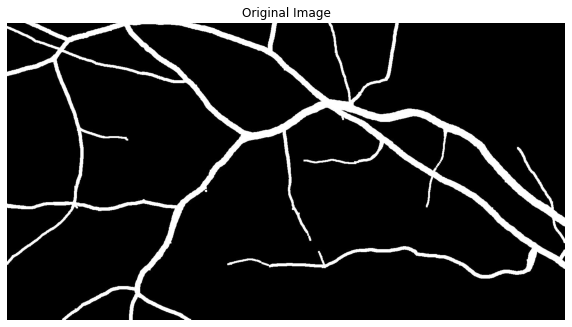

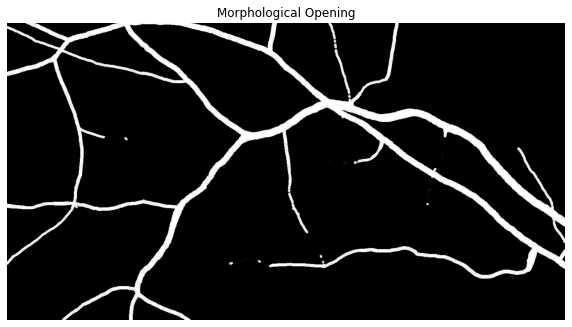

In [78]:
img = io.imread("images/2106753_vesselmask.jpg")

plt.figure(figsize = (10,10))
plt.imshow(img, cmap="gray")
plt.axis('off')
plt.title('Original Image')

# Opening with a 7 pixel diameter disk
img_open = opening(img, disk(3))

plt.figure(figsize = (10,10))
plt.imshow(img_open, cmap="gray")
plt.axis('off')
plt.title('Morphological Opening')

Text(0.5, 1.0, 'Thinned Image')

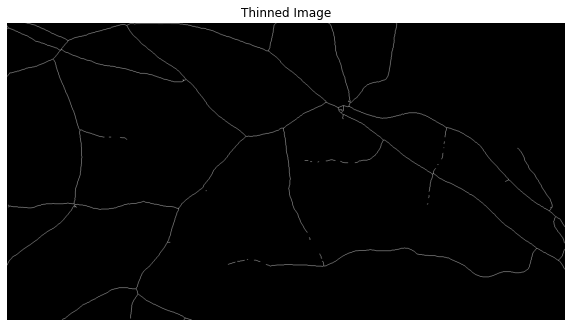

In [79]:
# Thinning image
img_thin = thin(img_open)

plt.figure(figsize = (10,10))
plt.imshow(img_thin, cmap="gray")
plt.axis('off')
plt.title('Thinned Image')

In [80]:
# calculating euclidian distances and summarizing 
vessel_length = np.sum(scipy.ndimage.distance_transform_edt(img_thin))

print(f"Total Vessel length: {vessel_length}")

Total Vessel length: 7650.414213562373


In [81]:
# calculating euclidian distances and summarizing 
dist_tf = scipy.ndimage.distance_transform_edt(img)
vessel_length = np.sum(dist_tf)

# thresholding vessel width by 40
wide_vessels = dist_tf > 40
wide_vessels_length = np.sum(dist_tf[wide_vessels])

print(f"Total length of vessels wider than 40 pixels: {wide_vessels_length}")

# thresholding vessel width by 15
wide_vessels = dist_tf > 15
wide_vessels_length = np.sum(dist_tf[wide_vessels])

print(f"Total length of vessels wider than 15 pixels: {wide_vessels_length}")

Total length of vessels wider than 40 pixels: 0.0
Total length of vessels wider than 15 pixels: 185.44522963087184


/tmp/ipykernel_1700/2604997362.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


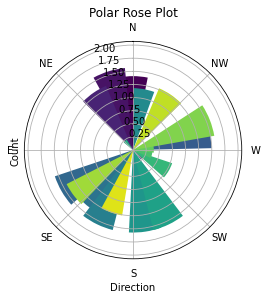

In [92]:
# Polar Rose Plot
label_img = label(img_thin)

# Region properties
regions = regionprops(label_img)

# Extract the major axis orientation
ori = [r.orientation for r in regions]
n = len(ori)

# Sector angles
angles = np.linspace(0, 2*np.pi, n+1)[:-1]

# Polar Plot
ax = plt.subplot(111, projection='polar')
bars = ax.bar(angles, ori, width=0.4)
ax.set_title('Polar Rose Plot')
ax.set_xlabel('Direction')
ax.set_ylabel('Count')
labels = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW']
ax.set_xticklabels(labels)
ax.set_theta_offset(np.pi/2)
ax.set_ylim([0, np.max(ori)+ 0.5])

for i, bar in enumerate(bars):
    bar.set_facecolor(plt.cm.viridis(i/n))
    
plt.show()

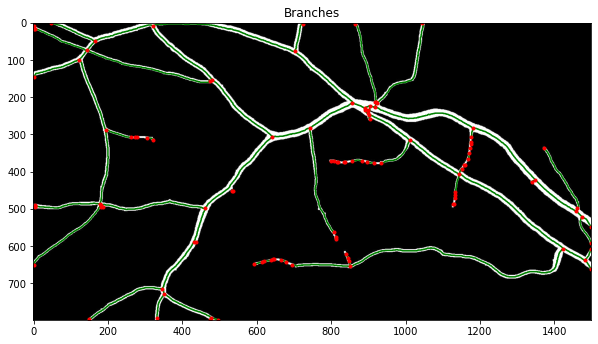

Branch 1: Length = 1754.47, Orientation = 1.41 degrees
Branch 2: Length = 6.83, Orientation = 1.57 degrees
Branch 3: Length = 22.57, Orientation = 1.33 degrees
Branch 4: Length = 8.20, Orientation = -0.23 degrees
Branch 5: Length = 2.00, Orientation = 0.00 degrees
Branch 6: Length = 20.10, Orientation = -0.23 degrees
Branch 7: Length = 30.08, Orientation = -1.50 degrees
Branch 8: Length = 11.49, Orientation = 1.57 degrees
Branch 9: Length = 24.70, Orientation = 1.37 degrees
Branch 10: Length = 5.66, Orientation = 1.57 degrees
Branch 11: Length = 4.83, Orientation = -1.18 degrees
Branch 12: Length = 3.27, Orientation = 1.57 degrees
Branch 13: Length = 3.27, Orientation = 1.57 degrees
Branch 14: Length = 9.41, Orientation = -0.23 degrees
Branch 15: Length = 4.47, Orientation = 0.79 degrees
Branch 16: Length = 7.82, Orientation = 0.37 degrees
Branch 17: Length = 16.99, Orientation = 0.40 degrees
Branch 18: Length = 3.27, Orientation = 1.57 degrees
Branch 19: Length = 23.32, Orientation = 

In [86]:
# drawing branches and calculating branch length and orientation
graph = sknw.build_sknw(img_thin)

# draw image
plt.figure(figsize = (10,10))
plt.imshow(img, cmap='gray')

# draw edges by pts
for (s,e) in graph.edges():
    ps = graph[s][e]['pts']
    plt.plot(ps[:,1], ps[:,0], 'green')
    
# draw nodes by o
nodes = graph.nodes()
ps = np.array([nodes[i]['o'] for i in nodes])
plt.plot(ps[:,1], ps[:,0], 'r.')

plt.title('Branches')
plt.show()

# Branch length and orientation
img_label = label(img_thin)
regions = regionprops(img_label)

branch_lengths = []
branch_orientations = []
for i in regions:
    if i.area < 2:
        continue
    branch_lengths.append(i.major_axis_length)
    branch_orientations.append(i.orientation)

for i, (length, orientation) in enumerate(zip(branch_lengths, branch_orientations)):
    print(f"Branch {i+1}: Length = {length:.2f}, Orientation = {orientation:.2f} degrees")